<a href="https://colab.research.google.com/github/LIvanoff/Big-Data-analysis-technologies-and-tools/blob/main/pr8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt

## Задача 1-2

1. Загрузить данные Market_Basket_Optimisation.csv.
2. Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров).


In [ ]:
df = pd.read_csv('Market_Basket_Optimisation.csv')
df.head(5)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

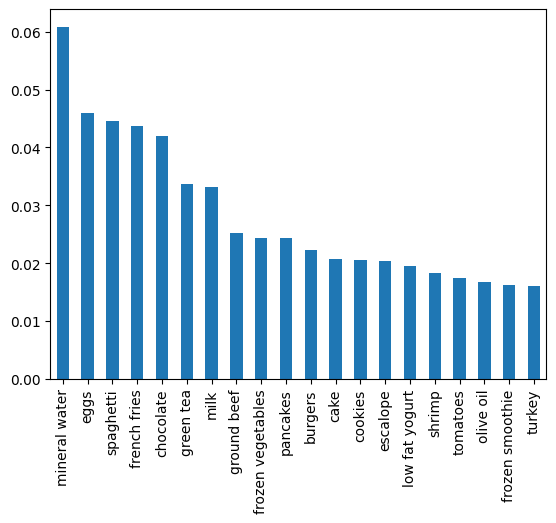

In [ ]:
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

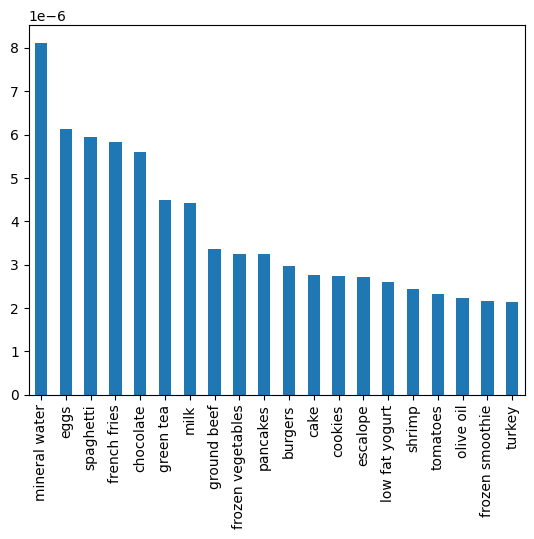

In [ ]:
df.stack().value_counts(normalize=True).head(20).apply(lambda item: item / df.shape[0]).plot(kind='bar')

## Задача 3

Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.

In [ ]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

In [ ]:
len(transactions)

7500

In [ ]:
!pip install apriori_python

### apriori_python

In [ ]:
from apriori_python import apriori

start =time.perf_counter()
_, rules = apriori(transactions, minSup=0.04, minConf=0.1)
time1 = (time.perf_counter() - start)

rules

[[{'mineral water'}, {'ground beef'}, 0.17179630665920537],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

### apyori

In [ ]:
!pip install apyori

In [ ]:
from apyori import apriori

start =time.perf_counter()
rules = apriori(transactions, min_support=0.04, min_confidence=0.019, min_lift=1.0001)
time2 = (time.perf_counter() - start)
rules = list(rules)
for rule in rules:
  for subset in rule[2]:
    print(subset[0], subset[1])
    print("Support: {0}; Confidence: {1}; Lift: {2};".format(rule[1], subset[2], subset[3]))
    print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Support: 0.05266666666666667; Confidence: 0.32139951179820997; Lift: 1.3489067367020564;

frozenset({'mineral water'}) frozenset({'chocolate'})
Support: 0.05266666666666667; Confidence: 0.22104085058757697; Lift: 1.3489067367020564;

frozenset({'eggs'}) frozenset({'mineral water'})
Support: 0.05093333333333333; Confidence: 0.28338278931750743; Lift: 1.1893513821383916;

frozenset({'mineral water'}) frozenset({'eggs'})
Support: 0.05093333333333333; Confidence: 0.21376608841634023; Lift: 1.1893513821383916;

frozenset({'ground beef'}) frozenset({'mineral water'})
Support: 0.040933333333333335; Confidence: 0.41655359565807326; Lift: 1.7482663499919135;

frozenset({'mineral water'}) frozenset({'ground beef'})
Support: 0.040933333333333335; Confidence: 0.1717963066592054; Lift: 1.7482663499919138;

frozenset({'milk'}) frozenset({'mineral water'})
Support: 0.048; Confidence: 0.3703703703703704; Lift: 1.5544363613753656;

frozenset({'miner

### efficient_apriori

In [ ]:
!pip install efficient_apriori

In [ ]:
from efficient_apriori import apriori

start =time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.04, min_confidence=0.019)
time3 = (time.perf_counter() - start)

for i in range(len(rules)):
  print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


## Задача 4

Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать
гиперпараметры для алгоритма так, чтобы выводилось порядка 10
наилучших правил.

In [ ]:
!pip install fpgrowth_py

In [ ]:
from fpgrowth_py import fpgrowth

start =time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.019)
time4 = (time.perf_counter() - start)

for i in range(len(rules)):
  print(rules[i])

[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]


## Задача 5

Сравнить время выполнения всех алгоритмов и построить гистограмму.

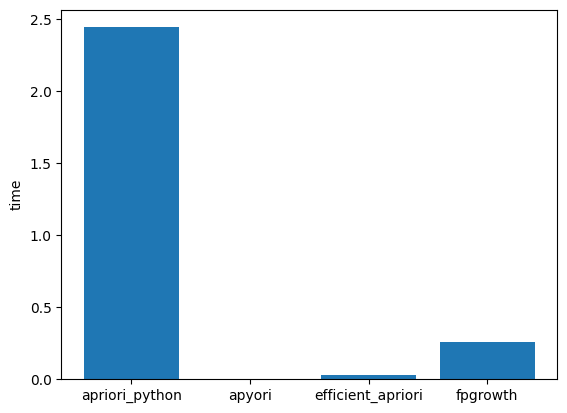

In [ ]:
plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth'], [time1, time2, time3, time4])
plt.ylabel('time')
plt.show()

## Задача 6-7

6. Загрузить данные data.csv.
7. Визуализировать данные (отразить на гистограммах относительную и
фактическую частоту встречаемости для 20 наиболее популярных
товаров).

In [ ]:
df = pd.read_csv('data.csv')
df.head(5)

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

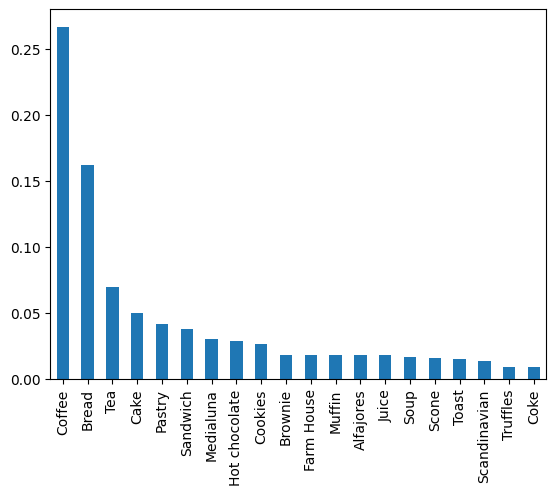

In [ ]:
df.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

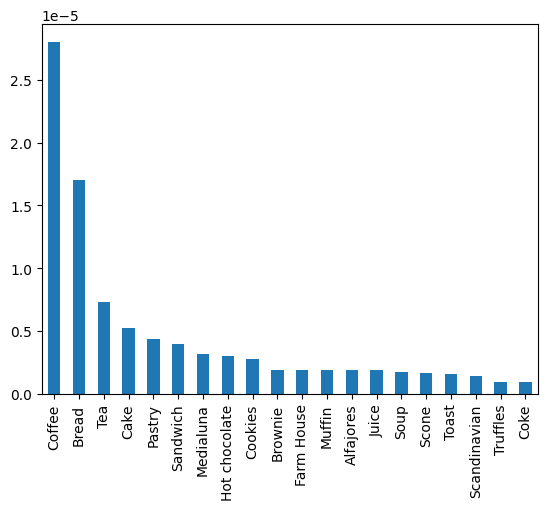

In [ ]:
df.stack().value_counts(normalize=True).head(20).apply(lambda item: item / df.shape[0]).plot(kind='bar')

## Задача 8

Применить алгоритм Apriori, используя 3 разные библиотеки
(apriori_python, apyori, efficient_apriori). Подобрать гиперпараметры для
алгоритмов так, чтобы выводилось порядка 10 наилучших правил.


In [ ]:
transactions = []
for i in range(df.shape[0]):
  row = df.iloc[i].dropna().tolist()
  transactions.append(row)

len(transactions)

9530

In [ ]:
from apriori_python import apriori

start =time.perf_counter()
_, rules = apriori(transactions, minSup=0.035, minConf=0.04)
time1 = (time.perf_counter() - start)

rules

[[{'Coffee'}, {'Sandwich'}, 0.0799469964664311],
 [{'Coffee'}, {'Pastry'}, 0.09938162544169611],
 [{'Coffee'}, {'Tea'}, 0.10424028268551237],
 [{'Coffee'}, {'Cake'}, 0.11439929328621908],
 [{'Coffee'}, {'Bread'}, 0.1881625441696113],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037]]

In [ ]:
from apyori import apriori

start =time.perf_counter()
rules = apriori(transactions, min_support=0.029, min_confidence=0.01, min_lift=1.0001)
time2 = (time.perf_counter() - start)
rules = list(rules)
for rule in rules:
  for subset in rule[2]:
    print(subset[0], subset[1])
    print("Support: {0}; Confidence: {1}; Lift: {2};".format(rule[1], subset[2], subset[3]))
    print()

frozenset({'Cake'}) frozenset({'Coffee'})
Support: 0.05435466946484785; Confidence: 0.5269582909460834; Lift: 1.109079618532724;

frozenset({'Coffee'}) frozenset({'Cake'})
Support: 0.05435466946484785; Confidence: 0.11439929328621908; Lift: 1.109079618532724;

frozenset({'Coffee'}) frozenset({'Hot chocolate'})
Support: 0.02938090241343127; Confidence: 0.06183745583038869; Lift: 1.0675923080862395;

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Support: 0.02938090241343127; Confidence: 0.5072463768115942; Lift: 1.0675923080862397;

frozenset({'Coffee'}) frozenset({'Medialuna'})
Support: 0.034942287513116475; Confidence: 0.07354240282685512; Lift: 1.198049741777657;

frozenset({'Medialuna'}) frozenset({'Coffee'})
Support: 0.034942287513116475; Confidence: 0.5692307692307693; Lift: 1.1980497417776572;

frozenset({'Coffee'}) frozenset({'Pastry'})
Support: 0.0472193074501574; Confidence: 0.09938162544169611; Lift: 1.162094344121919;

frozenset({'Pastry'}) frozenset({'Coffee'})
Support:

In [ ]:
from efficient_apriori import apriori

start =time.perf_counter()
itemsets, rules = apriori(transactions, min_support=0.035, min_confidence=0.04)
time3 = (time.perf_counter() - start)

for i in range(len(rules)):
  print(rules[i])

{Coffee} -> {Bread} (conf: 0.188, supp: 0.089, lift: 0.579, conv: 0.832)
{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Coffee} -> {Cake} (conf: 0.114, supp: 0.054, lift: 1.109, conv: 1.013)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Coffee} -> {Pastry} (conf: 0.099, supp: 0.047, lift: 1.162, conv: 1.015)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Coffee} -> {Sandwich} (conf: 0.080, supp: 0.038, lift: 1.120, conv: 1.009)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)
{Coffee} -> {Tea} (conf: 0.104, supp: 0.050, lift: 0.736, conv: 0.958)


## Задача 9

Применить алгоритм FP-Growth из библиотеки fpgrowth_py. Подобрать
гиперпараметры для алгоритма так, чтобы выводилось порядка 10
наилучших правил.


In [ ]:
from fpgrowth_py import fpgrowth

start =time.perf_counter()
itemsets, rules = fpgrowth(transactions, minSupRatio=0.05, minConf=0.04)
time4 = (time.perf_counter() - start)

for i in range(len(rules)):
  print(rules[i])

[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Coffee'}, {'Sandwich'}, 0.0799469964664311]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Coffee'}, {'Pastry'}, 0.09938162544169611]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Coffee'}, {'Cake'}, 0.11439929328621908]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Coffee'}, {'Tea'}, 0.10424028268551237]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]
[{'Coffee'}, {'Bread'}, 0.1881625441696113]


## Задача 10

Сравнить время выполнения всех алгоритмов и построить гистограмму.

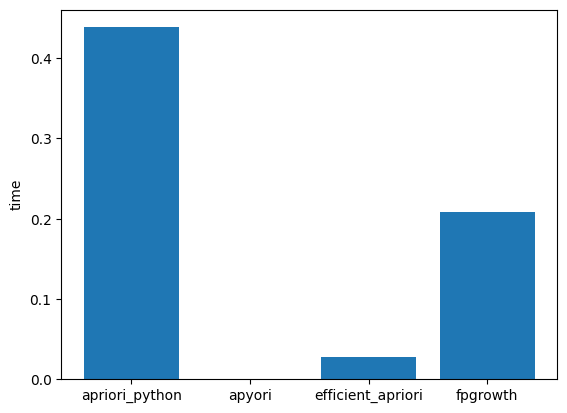

In [ ]:
plt.bar(['apriori_python','apyori','efficient_apriori','fpgrowth'], [time1, time2, time3, time4])
plt.ylabel('time')
plt.show()